# 範例

透過 SIFT 特徵實作 Brute-Force Matching

In [2]:
!ls data

box.png          box_in_scene.png joker.jpg        lena.png


In [10]:
import cv2
import numpy as np
from PIL import Image

# 以灰階方式讀入圖片
img_query = cv2.imread("data/box.png", cv2.IMREAD_GRAYSCALE)
img_train = cv2.imread("data/box_in_scene.png", cv2.IMREAD_GRAYSCALE)
# 建立 SIFT 物件
sift = cv2.xfeatures2d_SIFT.create()

# 偵測並計算 SIFT 特徵 (keypoints 關鍵點, descriptor 128 維敘述子)
kp1, dest1 = sift.detectAndCompute(img_query, None)
kp2, dest2 = sift.detectAndCompute(img_train, None)

## 基於 SIFT 特徵的暴力比對

- D.Lowe ratio test
- knn 比對

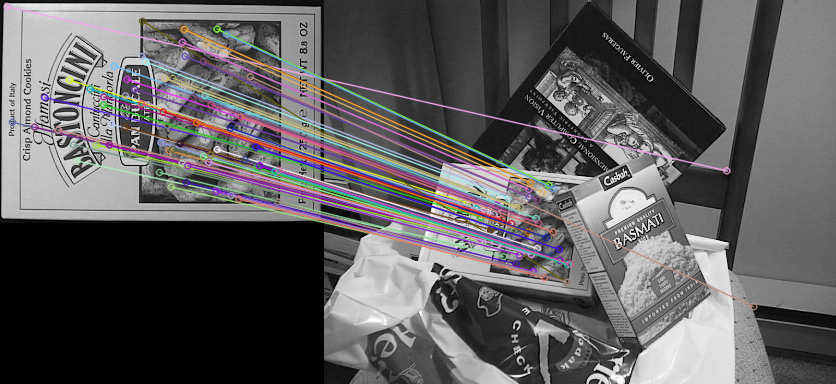

In [20]:
# 建立 Brute-Force Matching 物件
bf = cv2.BFMatcher(cv2.NORM_L2)

# 以 knn 方式暴力比對特徵
matches = bf.knnMatch(dest1, dest2, k=2)

# 透過 D.Lowe ratio test 排除不適合的配對
candidates =[]
for m, n in matches:
    if m.distance < 0.75*n.distance:
        candidates.append([m])

# 顯示配對結果
img_show = cv2.drawMatchesKnn(img_query, kp1, img_train, kp2, candidates, None, flags = 2)

# 顯示圖片
Image.fromarray(img_show)